In [33]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = "data\\"+file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']
#data2 = data[data['user'] == 'Aluminiumminimumimmunity']
#data2 = data[data['user'] == 'fyodor_m_d1821']



#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'devilbabymamadrama']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']
#data2 = data[data['user'] == 'nate_001_']
#data2 = data[data['user'] == 'enseje']
#data2 = data[data['user'] == 'kunmilan99']
#data2 = data[data['user'] == 'GoodStuffBuds']
#data2 = data[data['user'] == 'peroni_nasturo_azuro']
#data2 = data[data['user'] == 'icep1cke']
#data2 = data[data['user'] == 'bigladmush22']










# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
47,259,159,14177.0,14217.0
4,260,286,22304.0,22321.0
11,261,221,16854.0,17113.0
55,262,148,18261.0,18297.0
43,263,163,21038.0,21265.0
39,264,168,16748.0,16749.0
2,265,374,36592.0,44178.0
118,266,96,10781.0,10794.0
25,267,183,19216.0,19371.0
7,268,229,18826.0,19133.0


In [34]:
data2['user'].max()

'balintboss'

In [35]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
264,264,168,16748.0,16749.0
265,265,374,36592.0,44178.0
266,266,96,10781.0,10794.0
267,267,183,19216.0,19371.0
268,268,229,18826.0,19133.0


In [36]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,269.000000,269.000000,269.000000,269.000000
mean,134.000000,99.754647,18602.029740,18955.650558
std,77.797815,68.649766,7933.813431,7980.944464
min,0.000000,5.000000,1686.000000,1700.000000
25%,67.000000,53.000000,15857.000000,16327.000000
50%,134.000000,87.000000,18105.000000,18297.000000
75%,201.000000,128.000000,21038.000000,21265.000000
max,268.000000,568.000000,86771.000000,86789.000000


In [37]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,33,17532.0,17697.0,4.870000,4.915833
1,1,25,16994.0,17831.0,4.720556,4.953056
2,2,37,18697.0,19147.0,5.193611,5.318611
3,3,22,14924.0,17451.0,4.145556,4.847500
4,4,23,17458.0,18734.0,4.849444,5.203889


In [38]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,33,17532.0,17697.0,4.870000,4.915833,99.067639
1,1,25,16994.0,17831.0,4.720556,4.953056,95.305928
2,2,37,18697.0,19147.0,5.193611,5.318611,97.649762
3,3,22,14924.0,17451.0,4.145556,4.847500,85.519454
4,4,23,17458.0,18734.0,4.849444,5.203889,93.188854
5,5,76,20013.0,20382.0,5.559167,5.661667,98.189579
6,6,23,16043.0,16563.0,4.456389,4.600833,96.860472
7,7,22,15999.0,17773.0,4.444167,4.936944,90.018567
8,8,55,18475.0,18686.0,5.131944,5.190556,98.870812
9,9,43,15648.0,16418.0,4.346667,4.560556,95.310026


In [39]:
stream_stats['persenteg'].describe()

count    269.000000
mean      97.877160
std        5.877384
min       48.835864
25%       98.548417
50%       99.656393
75%       99.857472
max      100.000000
Name: persenteg, dtype: float64

In [40]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
183,183,23,3377.0,6915.0,0.938056,1.920833,48.835864
51,51,17,2861.0,5257.0,0.794722,1.460278,54.422675
143,143,85,10966.0,18655.0,3.046111,5.181944,58.783168
203,203,59,10439.0,14780.0,2.899722,4.105556,70.629229
176,176,25,7204.0,9574.0,2.001111,2.659444,75.245456
265,265,374,36592.0,44178.0,10.164444,12.271667,82.828557
186,186,77,11535.0,13794.0,3.204167,3.831667,83.623314
3,3,22,14924.0,17451.0,4.145556,4.847500,85.519454
38,38,50,23739.0,27145.0,6.594167,7.540278,87.452570
42,42,12,6857.0,7832.0,1.904722,2.175556,87.551073


In [41]:
stream_stats['watch_length_in_hour'].sum() /24

57.916041666666665

In [42]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
183,183,23,3377.0,6915.0,0.938056,1.920833,48.835864
51,51,17,2861.0,5257.0,0.794722,1.460278,54.422675
143,143,85,10966.0,18655.0,3.046111,5.181944,58.783168
203,203,59,10439.0,14780.0,2.899722,4.105556,70.629229
176,176,25,7204.0,9574.0,2.001111,2.659444,75.245456
265,265,374,36592.0,44178.0,10.164444,12.271667,82.828557
186,186,77,11535.0,13794.0,3.204167,3.831667,83.623314
3,3,22,14924.0,17451.0,4.145556,4.847500,85.519454
38,38,50,23739.0,27145.0,6.594167,7.540278,87.452570
42,42,12,6857.0,7832.0,1.904722,2.175556,87.551073


In [43]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
96,96,70,17123.0,17130.0,4.756389,4.758333,99.959136
104,104,78,21922.0,21930.0,6.089444,6.091667,99.963520
196,196,142,12442.0,12446.0,3.456111,3.457222,99.967861
77,77,99,14990.0,14994.0,4.163889,4.165000,99.973323
184,184,386,86771.0,86789.0,24.103056,24.108056,99.979260
241,241,115,15723.0,15726.0,4.367500,4.368333,99.980923
146,146,75,18021.0,18024.0,5.005833,5.006667,99.983356
81,81,139,22663.0,22666.0,6.295278,6.296111,99.986764
264,264,168,16748.0,16749.0,4.652222,4.652500,99.994029
162,162,121,18458.0,18458.0,5.127222,5.127222,100.000000


In [44]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
259,259,159,14177.0,14217.0,3.938056,3.949167,99.718647
260,260,286,22304.0,22321.0,6.195556,6.200278,99.923839
261,261,221,16854.0,17113.0,4.681667,4.753611,98.486531
262,262,148,18261.0,18297.0,5.072500,5.082500,99.803246
263,263,163,21038.0,21265.0,5.843889,5.906944,98.932518
264,264,168,16748.0,16749.0,4.652222,4.652500,99.994029
265,265,374,36592.0,44178.0,10.164444,12.271667,82.828557
266,266,96,10781.0,10794.0,2.994722,2.998333,99.879563
267,267,183,19216.0,19371.0,5.337778,5.380833,99.199835
268,268,229,18826.0,19133.0,5.229444,5.314722,98.395442


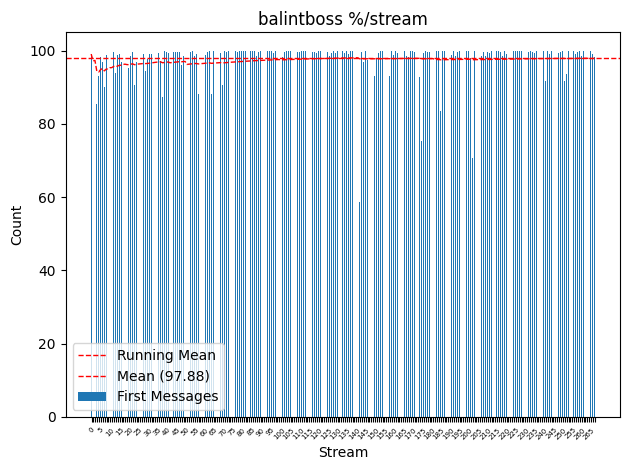

In [45]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()